# Anscombe's quatet

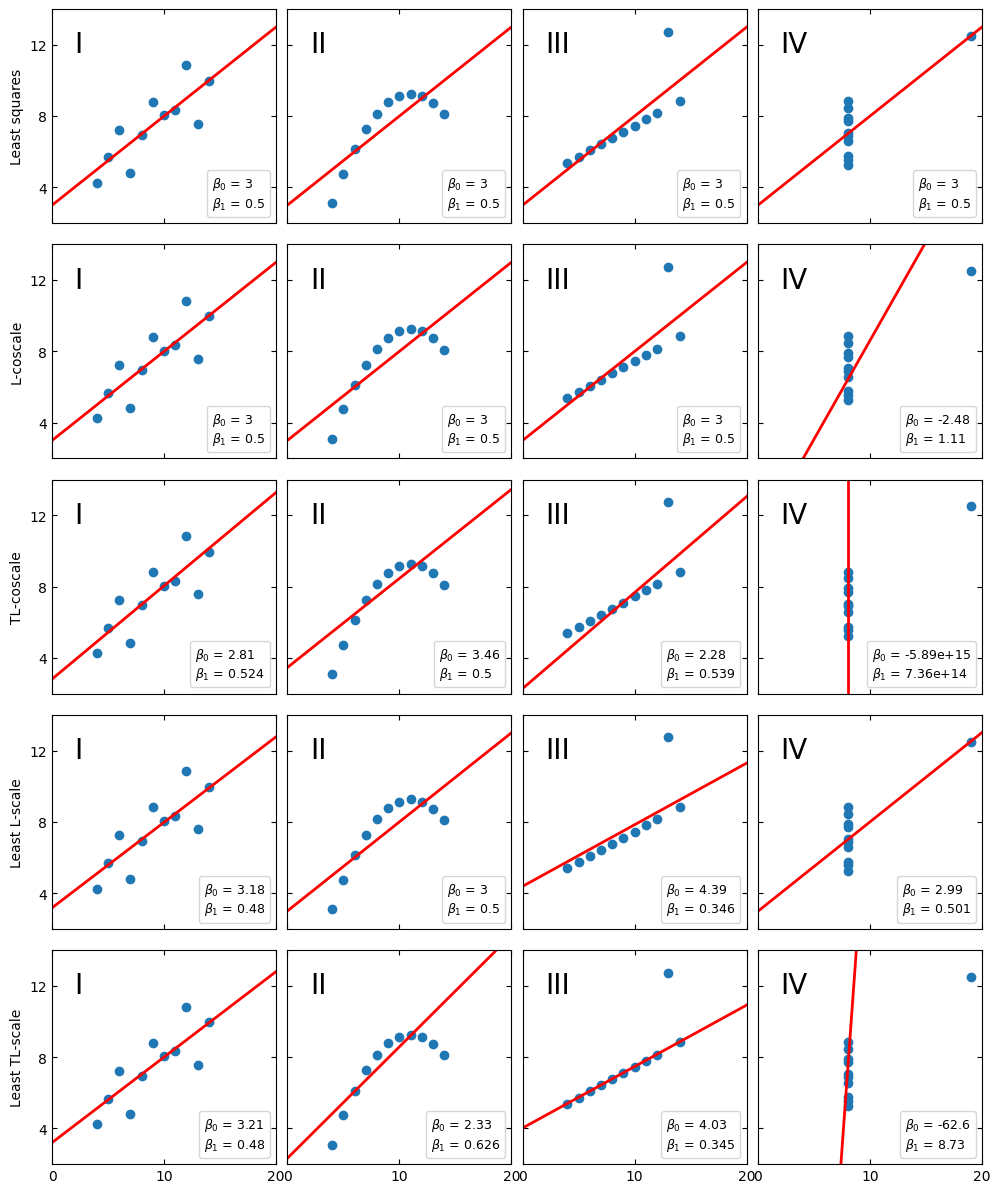

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar

import lmo


x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {'I': (x, y1), 'II': (x, y2), 'III': (x, y3), 'IV': (x4, y4)}

fig, axs = plt.subplots(
    5,
    4,
    sharex=True,
    sharey=True,
    figsize=(12, 15),
    gridspec_kw={'wspace': .05, 'hspace': .1},
)
bbox = {
    'boxstyle': 'round',
    'fc': 'blanchedalmond',
    'ec': 'orange',
    'alpha': 0.5,
}


def _plot(ax, const, slope):
    ax.axline(
        xy1=(0, const),
        slope=slope,
        color='r',
        lw=2,
        label=f'$\\beta_0$ = {const:.3g}\n$\\beta_1$ = {slope:.3g}',
    )
    ax.legend(
        loc='lower right',
        fontsize=9,
        handlelength=0,
        handletextpad=0,
        fancybox=True,
    )


axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))
for i, method in enumerate([
    'Least squares',
    'L-coscale',
    'TL-coscale',
    'Least L-scale',
    'Least TL-scale',
]):
    axs[i, 0].set_ylabel(method)

for j, (label, (x, y)) in enumerate(datasets.items()):
    for i in range(5):
        ax = axs[i, j]
        ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
        ax.tick_params(direction='in', top=True, right=True)
        ax.plot(x, y, 'o')

    yx = np.stack((y, x))

    # simple linear regression
    cov = np.cov(yx)
    ols_p1 = cov[0, 1] / cov[1, 1]
    ols_p0 = np.mean(y) - ols_p1 * np.mean(x)
    _plot(axs[0, j], ols_p0, ols_p1)

    # L-comoment simple linear regression
    l_coscale = lmo.l_coscale(yx)
    lco_p1 = l_coscale[0][1] / l_coscale[1][1]
    lco_p0 = lmo.l_loc(y) - lco_p1 * lmo.l_loc(x)
    _plot(axs[1, j], lco_p0, lco_p1)

    # TL-comoment simple linear regression
    tl_coscale = lmo.l_coscale(yx, trim=1)
    tlco_p1 = tl_coscale[0][1] / tl_coscale[1][1]
    tlco_p0 = lmo.l_loc(y, trim=1) - tlco_p1 * lmo.l_loc(x, trim=1)
    _plot(axs[2, j], tlco_p0, tlco_p1)

    # L-moment regression
    l_p1 = minimize_scalar(
        lambda p1: lmo.l_scale(yx[0] - p1 * yx[1], cache=True),
    ).x
    l_p0 = lmo.l_loc(y) - l_p1 * lmo.l_loc(x)
    _plot(axs[3, j], l_p0, l_p1)

    # TL-moment regression
    tl_p1 = minimize_scalar(
        lambda p1: lmo.l_scale(yx[0] - p1 * yx[1], trim=1, cache=True),
    ).x
    tl_p0 = lmo.l_loc(y, trim=1) - tl_p1 * lmo.l_loc(x, trim=1)
    _plot(axs[4, j], tl_p0, tl_p1)
